In [1]:
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
#for ipynb
%matplotlib inline
import yaml

In [2]:
#get list of files with data
in_dict = {'single-fragment-length-GC-correction':'../results/'}

samples_yaml = '../config/samples.GC.yaml'
tfx_path = '../../../../metadata/delfi/analysis/Delfi_tumor_fraction_data.txt'
metadata_path = '../../../../../griffin_paper/data/delfi_metadata/analysis/matched_metadata_corrected.txt'

with open(samples_yaml, 'r') as f:
    samples = yaml.safe_load(f)
samples = samples['samples']
samples = list(samples.keys())  
    
in_files = {}
for group in in_dict.keys():
    in_dir = in_dict[group]
    in_files[group] = []
    for sample in samples:
        in_files[group].append(in_dir+'/'+sample+'/'+sample+'.GC_corrected.coverage.tsv')
    print(group,len(in_files[group]))    

single-fragment-length-GC-correction 423


In [3]:
#get columns with coverage data
plot_columns = np.arange(-990,990,15)
str_plot_columns = [str(m) for m in plot_columns]

In [4]:
#import data
start_time = time.time()
data = pd.DataFrame()
for group in in_files.keys():
    for i,file in enumerate(in_files[group]):
        if i%100==0:
            print(i,'importing',file,np.round(time.time()-start_time))
        current = pd.read_csv(file,sep='\t')
        current['site_group'] = group
        data = data.append(current, ignore_index=True)
        

0 importing ../results//Bile_Duct_Cancer_CGPLPA114/Bile_Duct_Cancer_CGPLPA114.GC_corrected.coverage.tsv 0.0
100 importing ../results//Colorectal_Cancer_CGCRC321/Colorectal_Cancer_CGCRC321.GC_corrected.coverage.tsv 2.0
200 importing ../results//Healthy_CGPLH365/Healthy_CGPLH365.GC_corrected.coverage.tsv 4.0
300 importing ../results//Healthy_CGPLH479/Healthy_CGPLH479.GC_corrected.coverage.tsv 8.0
400 importing ../results//Pancreatic_Cancer_CGPLPA37/Pancreatic_Cancer_CGPLPA37.GC_corrected.coverage.tsv 12.0


In [5]:
data.set_index('sample')

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,central_coverage,amplitude,outlier_cutoff,exclude_zero_mappability,correction,number_of_sites,site_name,smoothing,CNA_normalization,site_group
sample,,,,,,,,,,,,,,,,,,,,,
Bile_Duct_Cancer_CGPLPA114,0.98446,0.98312,0.97298,0.96742,0.96898,0.97065,0.97384,0.97992,0.98405,0.98677,...,0.96557,0.43271,12.0,True,GC_corrected,30000,AHR.hg38.30000,True,False,single-fragment-length-GC-correction
Bile_Duct_Cancer_CGPLPA114,0.99035,0.98614,0.98301,0.98406,0.98355,0.98500,0.98791,0.98913,0.99043,0.98997,...,1.07914,0.27611,11.0,True,GC_corrected,30000,AR.hg38.30000,True,False,single-fragment-length-GC-correction
Bile_Duct_Cancer_CGPLPA114,0.97891,0.98080,0.98194,0.97781,0.97445,0.97153,0.97332,0.97123,0.97068,0.97667,...,1.00329,0.21780,10.0,True,GC_corrected,30000,ARNT.hg38.30000,True,False,single-fragment-length-GC-correction
Bile_Duct_Cancer_CGPLPA114,0.98033,0.97998,0.98006,0.97772,0.97881,0.97784,0.97543,0.97880,0.97335,0.97584,...,1.08601,0.52164,9.0,True,GC_corrected,30000,ARNTL.hg38.30000,True,False,single-fragment-length-GC-correction
Bile_Duct_Cancer_CGPLPA114,0.98269,0.98592,0.98788,0.99357,0.98962,0.98972,0.99136,0.98464,0.98120,0.97466,...,1.01363,0.29192,13.0,True,GC_corrected,30000,ASCL1.hg38.30000,True,False,single-fragment-length-GC-correction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pancreatic_Cancer_CGPLPA95,0.98370,0.98136,0.97661,0.96887,0.95854,0.95993,0.95752,0.96267,0.96841,0.97389,...,0.98649,0.52395,8.0,True,GC_corrected,30000,ZNF467.hg38.30000,True,False,single-fragment-length-GC-correction
Pancreatic_Cancer_CGPLPA95,0.97606,0.97009,0.96529,0.96434,0.96442,0.96412,0.96673,0.97196,0.97825,0.98282,...,1.02416,0.47917,10.0,True,GC_corrected,30000,ZNF554.hg38.30000,True,False,single-fragment-length-GC-correction
Pancreatic_Cancer_CGPLPA95,0.95908,0.93311,0.91138,0.89703,0.90531,0.91784,0.93908,0.96006,0.98413,0.99392,...,0.82284,3.32098,5.0,True,GC_corrected,30000,ZNF580.hg38.30000,True,False,single-fragment-length-GC-correction


In [6]:
#get the metadata
#get the metadata
metadata1 = pd.read_csv(metadata_path, sep='\t')
metadata1 = metadata1[['new_sample_name','Stage','Age at Diagnosis', 'Gender']].set_index('new_sample_name') 
metadata2 = pd.read_csv(tfx_path, sep='\t')
metadata2 = metadata2[['sample','tumor_fraction','sample_type']].set_index('sample') 
metadata = metadata1.merge(metadata2, left_index = True, right_index=True)
metadata = metadata.reset_index()
metadata = metadata.rename(columns = {'index':'sample'})
metadata['status'] = np.where(metadata['sample_type'].str.contains('ancer'),1,0)
metadata['Stage'] = metadata['Stage'].str.strip(' ')

metadata_columns = ['sample','tumor_fraction','status','sample_type','Stage','Age at Diagnosis', 'Gender']
metadata = metadata[metadata_columns]
print("metadata:",len(metadata))


#merge with data
print(len(data))
data = data.merge(metadata, on = 'sample')
print(len(data))

metadata: 423
114210
114210


In [7]:
data

,-990,-975,-960,-945,-930,-915,-900,-885,-870,-855,...,smoothing,CNA_normalization,sample,site_group,tumor_fraction,status,sample_type,Stage,Age at Diagnosis,Gender
0,0.98446,0.98312,0.97298,0.96742,0.96898,0.97065,0.97384,0.97992,0.98405,0.98677,...,True,False,Bile_Duct_Cancer_CGPLPA114,single-fragment-length-GC-correction,0.02606,1,Bile_Duct_Cancer,II,NaN,F
1,0.99035,0.98614,0.98301,0.98406,0.98355,0.98500,0.98791,0.98913,0.99043,0.98997,...,True,False,Bile_Duct_Cancer_CGPLPA114,single-fragment-length-GC-correction,0.02606,1,Bile_Duct_Cancer,II,NaN,F
2,0.97891,0.98080,0.98194,0.97781,0.97445,0.97153,0.97332,0.97123,0.97068,0.97667,...,True,False,Bile_Duct_Cancer_CGPLPA114,single-fragment-length-GC-correction,0.02606,1,Bile_Duct_Cancer,II,NaN,F
3,0.98033,0.97998,0.98006,0.97772,0.97881,0.97784,0.97543,0.97880,0.97335,0.97584,...,True,False,Bile_Duct_Cancer_CGPLPA114,single-fragment-length-GC-correction,0.02606,1,Bile_Duct_Cancer,II,NaN,F
4,0.98269,0.98592,0.98788,0.99357,0.98962,0.98972,0.99136,0.98464,0.98120,0.97466,...,True,False,Bile_Duct_Cancer_CGPLPA114,single-fragment-length-GC-correction,0.02606,1,Bile_Duct_Cancer,II,NaN,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114205,0.98370,0.98136,0.97661,0.96887,0.95854,0.95993,0.95752,0.96267,0.96841,0.97389,...,True,False,Pancreatic_Cancer_CGPLPA95,single-fragment-length-GC-correction,0.04484,1,Pancreatic_Cancer,II,64.0,F
114206,0.97606,0.97009,0.96529,0.96434,0.96442,0.96412,0.96673,0.97196,0.97825,0.98282,...,True,False,Pancreatic_Cancer_CGPLPA95,single-fragment-length-GC-correction,0.04484,1,Pancreatic_Cancer,II,64.0,F
114207,0.95908,0.93311,0.91138,0.89703,0.90531,0.91784,0.93908,0.96006,0.98413,0.99392,...,True,False,Pancreatic_Cancer_CGPLPA95,single-fragment-length-GC-correction,0.04484,1,Pancreatic_Cancer,II,64.0,F
114208,1.00050,0.99921,0.99788,1.00001,0.99521,0.99241,0.99584,0.99257,0.99126,0.98515,...,True,False,Pancreatic_Cancer_CGPLPA95,single-fragment-length-GC-correction,0.04484,1,Pancreatic_Cancer,II,64.0,F


In [8]:
print(len(data['site_name'].unique()))
print(len(data['sample'].unique()))
print(len(data))
print(len(data['site_name'].unique())*len(data['sample'].unique())*len(data['site_group'].unique()))


270
423
114210
114210


In [9]:
data['number_of_sites'].unique()

array([30000])

In [10]:
data['Stage'].unique()

array(['II', 'IV', 'I', 'III', 'X', '0', nan], dtype=object)

In [11]:
#get the key columns
data = data[metadata_columns+['site_name','correction','site_group',
                              'central_coverage','amplitude','mean_coverage']+str_plot_columns]
print(len(data))

site_groups = in_dict.keys()

site_names = data['site_name'].unique()

for group,df in data.groupby('site_group'):
    print(group,len(df['site_name'].unique()))

    #df.to_csv('merged_data/'+group+'_data_with_features.txt', sep='\t', index=False)
    
    #reformat for logistic regression
    reformatted = df[metadata_columns+['site_name','site_group','central_coverage','amplitude','mean_coverage']]
    reformatted = reformatted.set_index(metadata_columns+['site_group','site_name']).unstack()
    new_column_names = []
    for item in reformatted.columns.values:
        new_column_names.append('_'.join(item))
    reformatted.columns = new_column_names
    reformatted.to_csv('merged_data/'+group+'_reformatted.txt', sep='\t')
    print(reformatted.shape)

114210
single-fragment-length-GC-correction 270
(423, 810)


In [12]:
810/3

270.0

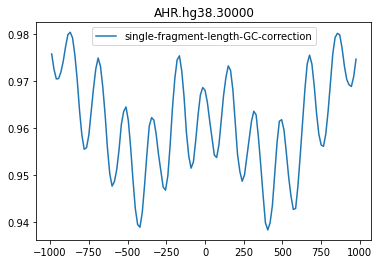

In [13]:
#plot
for site_name in data['site_name'].unique():
    for site_group in data['site_group'].unique():
        current = data[(data['site_name']==site_name) & (data['site_group']==site_group)][str_plot_columns].mean()
        plt.plot(plot_columns,current, label=site_group)
    plt.title(site_name)
    plt.legend()
    break




fft real -0.24306420576689958
fft imag -0.08126300456277699
fft magn 0.2562886732488653
sum x coords -0.24306420576691223
sum y coords -0.08126300456279778
magnitude: 0.2562886732488838


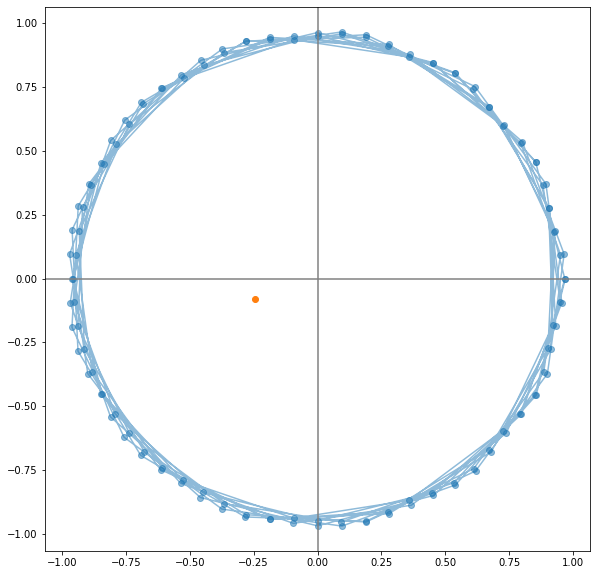

In [14]:
fft_columns = np.arange(-960,960,15)
str_fft_columns = [str(m) for m in fft_columns]

#plot out what the fft is doing for a given frequency
demo_res = np.fft.fft(current[str_fft_columns])
demo_signal = current[str_fft_columns]

frequency = 10
print('fft real', demo_res[frequency].real)
print('fft imag', demo_res[frequency].imag)
print('fft magn',np.abs(demo_res[frequency]))

#get angles for rotation
angles = np.linspace(0,2*np.pi,len(demo_signal)+1)
angles = -angles[0:-1]

#wrapped at frequency
heights = np.sin(angles*frequency)*demo_signal
widths = np.cos(angles*frequency)*demo_signal
fig,ax = plt.subplots(figsize = (10,10))
ax.plot(widths,heights, alpha = 0.5)
ax.scatter(widths,heights, alpha = 0.5)
ax.set_aspect('equal')
ax.scatter(sum(widths),sum(heights))
ax.axvline(0, color = 'grey')
ax.axhline(0, color = 'grey')
print('sum x coords',sum(widths))
print('sum y coords',sum(heights))
print('magnitude:',np.sqrt(sum(widths)**2+sum(heights)**2))

In [15]:
# from scipy.signal import find_peaks
# plt.plot(fft_columns,current)
# peaks =  [fft_columns[m] for m in find_peaks(current)[0]]
# plt.scatter(peaks,[.99 for m in peaks])
# print(peaks)

# spacing = []
# for i in range(len(peaks)-1):
#     spacing.append(peaks[i+1]-peaks[i])
# np.mean(spacing)